In [46]:
import pandas as pd


path = r'Life Expectancy Data.xlsx'

# Load the excel file into the pandas dataframe
life_expectency_dataset = pd.read_excel(path)

# Print the first 5 rows
print(life_expectency_dataset.head())



       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [47]:
import pandas as pd


# Perform one-hot encoding on the Country variable
dataset1 = pd.get_dummies(life_expectency_dataset, columns=['Country'])

# Print the first 5 rows of the dataframe to check if it was loaded correctly
print(dataset1.head())

   Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0     0.01               71.279624         65.0      1154   19.1  ...   
1     0.01               73.523582         62.0       492   18.6  ...   
2     0.01               73.219243         64.0       430   18.1  ...   
3     0.01               78.184215         67.0      2787   17.6  ...   
4     0.01                7.097109         68.0      3013   17.2  ...   

   Country_United Republic of Tanzania  Country_United States of America  \
0                                    0        

In [48]:
path_continents = r'da.xlsx'

# Load the other excel excel (continent of each country)
continents = pd.read_excel(path_continents)

# Print the first 5 rows 
print(continents.head())

  Continent   Country
0    Africa   Algeria
1    Africa    Angola
2    Africa     Benin
3    Africa  Botswana
4    Africa   Burkina


In [49]:
import pandas as pd



# Merge the two dataframes so we have the continent of each country
datasetr = pd.merge(life_expectency_dataset, continents, on='Country', how='left')

# Print the first 5 rows
print(datasetr.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0             

In [50]:
print(datasetr[datasetr['Continent'] == 'Asia'])

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2901        Yemen  2004  Developing              62.2            247.0   
2902        Yemen  2003  Developing              61.9            249.0   
2903        Yemen  2002  Developing              61.5             25.0   
2904        Yemen  2001  Developing              61.1            251.0   
2905        Yemen  2000  Developing              68.0            252.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [51]:
# Check number of missing values in each column
datasetr2=datasetr
print(datasetr2.isnull().sum())



Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Continent                          354
dtype: int64


In [52]:
missing_values = datasetr[datasetr['Continent'].isnull()].groupby('Country').size()
print(missing_values)

Country
Bolivia (Plurinational State of)                        16
Brunei Darussalam                                       16
Burkina Faso                                            16
Cabo Verde                                              16
Cook Islands                                             1
Czechia                                                 16
CÃ´te d'Ivoire                                          16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Iran (Islamic Republic of)                              16
Lao People's Democratic Republic                        16
Micronesia (Federated States of)                        16
Myanmar                                                 16
Niue                                                     1
Republic of Korea                                       16
Republic of Moldova                                     16
Syrian Arab Republic                            

In [53]:
#adding some continents manually

datasetr.loc[datasetr['Country'] == 'United States of America', 'Continent'] = 'North America'
datasetr.loc[datasetr['Country'] == 'Republic of Korea', 'Continent'] = 'Asia'
datasetr.loc[datasetr['Country'] == 'United Kingdom of Great Britain and Northern Ireland ', 'Continent'] = 'Europe'
datasetr.loc[datasetr['Country'] == 'Venezuela (Bolivarian Republic of)', 'Continent'] = 'South America'
datasetr.loc[datasetr['Country'] == 'Myanmar', 'Continent'] = 'Asia'
datasetr.loc[datasetr['Country'] == 'Syrian Arab Republic', 'Continent'] = 'Asia'
# Verify that the value was updated
print(datasetr[datasetr['Country'] == 'United States of America'])

                       Country  Year     Status  Life expectancy   \
2794  United States of America  2015  Developed              79.3   
2795  United States of America  2014  Developed              79.1   
2796  United States of America  2013  Developed              78.9   
2797  United States of America  2012  Developed              78.8   
2798  United States of America  2011  Developed              78.7   
2799  United States of America  2010  Developed              78.7   
2800  United States of America  2009  Developed              78.5   
2801  United States of America  2008  Developed              78.2   
2802  United States of America  2007  Developed              78.1   
2803  United States of America  2006  Developed              77.8   
2804  United States of America  2005  Developed              77.5   
2805  United States of America  2004  Developed              77.5   
2806  United States of America  2003  Developed              77.2   
2807  United States of America  20

In [54]:
missing_values = datasetr[datasetr['Continent'].isnull()].groupby('Country').size()


print(missing_values)

Country
Bolivia (Plurinational State of)                        16
Brunei Darussalam                                       16
Burkina Faso                                            16
Cabo Verde                                              16
Cook Islands                                             1
Czechia                                                 16
CÃ´te d'Ivoire                                          16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Iran (Islamic Republic of)                              16
Lao People's Democratic Republic                        16
Micronesia (Federated States of)                        16
Niue                                                     1
Republic of Moldova                                     16
The former Yugoslav republic of Macedonia               16
Timor-Leste                                             16
United Kingdom of Great Britain and Northern Ire

In [55]:
datasetr

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa


In [56]:
datasetr['Status'].unique()


array(['Developing', 'Developed'], dtype=object)

In [57]:
# Replace "Developed" with 1 and "Developing" with 0
datasetr["Status"] = datasetr["Status"].replace({"Developed": 1, "Developing": 0})

In [58]:
datasetr

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa


In [59]:
# Perform one hot encoding on the 'Continent' column
continent_onehot = pd.get_dummies(datasetr['Continent'], prefix='Continent')

# Add the new columns to the original DataFrame
datasetr2 = pd.concat([datasetr, continent_onehot], axis=1)

# Drop the original 'Continent' column
datasetr2.drop('Continent', axis=1, inplace=True)

# Print the first 5 rows of the modified DataFrame
print(datasetr2.head())

       Country  Year  Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015       0              65.0            263.0   
1  Afghanistan  2014       0              59.9            271.0   
2  Afghanistan  2013       0              59.9            268.0   
3  Afghanistan  2012       0              59.5            272.0   
4  Afghanistan  2011       0              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1           

In [60]:
datasetr2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,0,1,0,0,0,0
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,0,1,0,0,0,0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,0,1,0,0,0,0
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,17.9,18.0,0.463,9.8,0,1,0,0,0,0
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,18.2,18.2,0.454,9.5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,9.4,9.4,0.407,9.2,1,0,0,0,0,0
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,9.8,9.9,0.418,9.5,1,0,0,0,0,0
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,1.2,1.3,0.427,10.0,1,0,0,0,0,0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,1.6,1.7,0.427,9.8,1,0,0,0,0,0


In [61]:
Asia_countries = datasetr2[datasetr2['Continent_Asia'] == 1]
Europe_countries = datasetr2[datasetr2['Continent_Europe'] == 1]

# Print the country names
print(Europe_countries['Country'].tolist())


['Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Armenia', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belg

In [62]:
# Check number of missing values in each column
print(datasetr2.isnull().sum())


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Continent_Africa                     0
Continent_Asia                       0
Continent_Europe                     0
Continent_North America  

In [63]:
datasetr2


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,0,1,0,0,0,0
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,0,1,0,0,0,0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,0,1,0,0,0,0
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,17.9,18.0,0.463,9.8,0,1,0,0,0,0
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,18.2,18.2,0.454,9.5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,9.4,9.4,0.407,9.2,1,0,0,0,0,0
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,9.8,9.9,0.418,9.5,1,0,0,0,0,0
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,1.2,1.3,0.427,10.0,1,0,0,0,0,0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,1.6,1.7,0.427,9.8,1,0,0,0,0,0


In [64]:
datasetr2.dropna(subset=['Life expectancy '], inplace=True)


In [65]:
# Check number of missing values in each column
print(datasetr2.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
Continent_Africa                     0
Continent_Asia                       0
Continent_Europe                     0
Continent_North America  

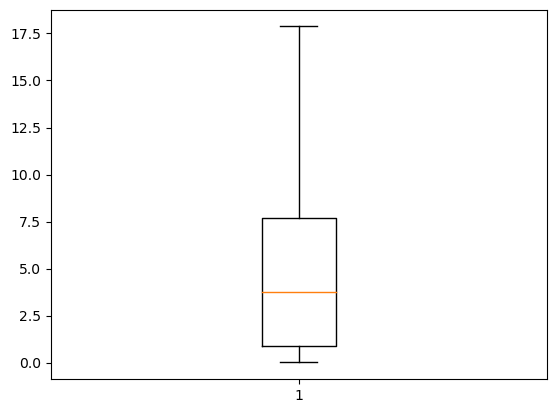

In [66]:
import matplotlib.pyplot as plt
# Load the dataset into a pandas dataframe
df = datasetr

# Create a box plot for the "Alcohol" column
plt.boxplot(df['Alcohol'].dropna())
plt.show()

In [67]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = life_expectency_dataset

# Calculate the mean and standard deviation of the "Alcohol" column
alcohol_mean = df['Alcohol'].mean()
alcohol_std = df['Alcohol'].std()

# Calculate the lower and upper bounds for the values that are two standard deviations away from the mean
lower_bound = alcohol_mean - (2 * alcohol_std)
upper_bound = alcohol_mean + (2 * alcohol_std)

# Count the number of values in the "Alcohol" column that are outside of the lower and upper bounds
num_outliers = len(df[(df['Alcohol'] < lower_bound) | (df['Alcohol'] > upper_bound)])

print(f"Number of outliers with two standard deviations: {num_outliers}")


Number of outliers with two standard deviations: 68


In [68]:
# Calculate the mean of alcohol for non-missing values
mean_alcohol = datasetr2['Alcohol'].mean()

# Replace missing values with the mean
datasetr2['Alcohol'].fillna(mean_alcohol, inplace=True)


In [69]:
# Calculate the mean of alcohol for non-missing values
median_HepatitisB = datasetr2['Hepatitis B'].median()

# Replace missing values with the mean
datasetr2['Hepatitis B'].fillna(median_HepatitisB, inplace=True)

In [70]:
# Calculate the mean of alcohol for non-missing values
median_BMI = datasetr2[' BMI '].median()

# Replace missing values with the mean
datasetr2[' BMI '].fillna(median_BMI, inplace=True)

In [71]:
dataseto = datasetr2

In [72]:
from sklearn.impute import KNNImputer

column = 'Polio'

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values of the selected column
datasetr2[column] = imputer.fit_transform(datasetr2[[column]])

column = 'Total expenditure'

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values of the selected column
datasetr2[column] = imputer.fit_transform(datasetr2[[column]])

column = 'Diphtheria '

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values of the selected column
datasetr2[column] = imputer.fit_transform(datasetr2[[column]])

column = 'GDP'

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values of the selected column
datasetr2[column] = imputer.fit_transform(datasetr2[[column]])


column = 'Population'

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values of the selected column
datasetr2[column] = imputer.fit_transform(datasetr2[[column]])

column = ' thinness  1-19 years'

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values of the selected column
datasetr2[column] = imputer.fit_transform(datasetr2[[column]])

column = ' thinness 5-9 years'

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values of the selected column
datasetr2[column] = imputer.fit_transform(datasetr2[[column]])



column = 'Income composition of resources'

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=20)

# Impute the missing values of the selected column
datasetr2[column] = imputer.fit_transform(datasetr2[[column]])


column = 'Schooling'

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=20)

# Impute the missing values of the selected column
datasetr2[column] = imputer.fit_transform(datasetr2[[column]])


In [73]:
print(datasetr2.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Continent_Africa                   0
Continent_Asia                     0
Continent_Europe                   0
Continent_North America            0
Continent_Oceania                  0
C

In [74]:
cleaned_df = datasetr2

In [75]:
cleaned_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,0,1,0,0,0,0
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,0,1,0,0,0,0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,0,1,0,0,0,0
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,17.9,18.0,0.463,9.8,0,1,0,0,0,0
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,18.2,18.2,0.454,9.5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,9.4,9.4,0.407,9.2,1,0,0,0,0,0
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,9.8,9.9,0.418,9.5,1,0,0,0,0,0
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,1.2,1.3,0.427,10.0,1,0,0,0,0,0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,1.6,1.7,0.427,9.8,1,0,0,0,0,0


In [76]:
print(cleaned_df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Continent_Africa                   0
Continent_Asia                     0
Continent_Europe                   0
Continent_North America            0
Continent_Oceania                  0
C

In [77]:
cleaned_data = cleaned_df.drop(columns=["Country"])

from scipy import stats
import numpy as np
# Calculate z-scores for each numerical column
z_scores = stats.zscore(cleaned_data.select_dtypes(include='number'))

# Find absolute z-score greater than 3, indicating outliers
outliers = (abs(z_scores) > 4).any(axis=1)

# Remove rows containing outliers
cleaned_data = cleaned_data[~outliers]


In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

datalast = cleaned_data

# create the scaler object
scaler = MinMaxScaler()
# fit and transform the data
data_scaled_min_max_scalar = scaler.fit_transform(datalast)
data_scaled_min_max_scalar = pd.DataFrame(data_scaled_min_max_scalar, columns=datalast.columns)
# check the result
print(data_scaled_min_max_scalar.head())

# create the scaler object fr optimization
data_scaled = data_scaled_min_max_scalar

# create the scaler object
scaler = StandardScaler()
# fit and transform the data
data_scaled_std = scaler.fit_transform(datalast)
data_scaled_std = pd.DataFrame(data_scaled_std, columns=datalast.columns)
# check the result
print(data_scaled_std.head())


       Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0  1.000000     0.0             0.520         0.415214       0.161039   
1  0.933333     0.0             0.418         0.427892       0.166234   
2  0.866667     0.0             0.418         0.423138       0.171429   
3  0.800000     0.0             0.410         0.429477       0.179221   
4  0.733333     0.0             0.404         0.434231       0.184416   

   Alcohol  percentage expenditure  Hepatitis B  Measles       BMI   ...  \
0      0.0                0.008241     0.653061  0.025682  0.257102  ...   
1      0.0                0.008500     0.622449  0.010949  0.250000  ...   
2      0.0                0.008465     0.642857  0.009570  0.242898  ...   
3      0.0                0.009039     0.673469  0.062024  0.235795  ...   
4      0.0                0.000821     0.683673  0.067054  0.230114  ...   

    thinness  1-19 years   thinness 5-9 years  \
0               0.772727             0.763393   
1     

In [79]:
from sklearn.feature_selection import SelectKBest, f_regression

# Set the target variable
target_variable = data_scaled_min_max_scalar['Life expectancy ']

# Select the top 5 features using the f_regression score
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(data_scaled.drop(columns=['Life expectancy ']), target_variable)

# Get the column names of the selected features
selected_features = data_scaled.drop(columns=['Life expectancy ']).columns[selector.get_support()]

# Print the selected features
print(selected_features)


Index(['Adult Mortality', ' HIV/AIDS', 'Income composition of resources',
       'Schooling', 'Continent_Africa'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [80]:
import pandas as pd

# Load the life expectancy dataset
life_expectancy = data_scaled_std;

# Select the columns for analysis
cols = ["Year", "Status", "Life expectancy ", "Adult Mortality", "Alcohol", " BMI "," HIV/AIDS","GDP", "Hepatitis B", "Polio", "Total expenditure", "Diphtheria ", "Population", "Income composition of resources", "Schooling", 'Continent_Africa']

# Create a correlation matrix
corr_matrix = life_expectancy[cols].corr()

# Print the correlation of each variable with the target variable (Life expectancy)
print(corr_matrix["Life expectancy "].sort_values(ascending=False))


Life expectancy                    1.000000
Schooling                          0.733746
Income composition of resources    0.695342
 BMI                               0.571195
Diphtheria                         0.497427
Polio                              0.478056
Status                             0.456990
GDP                                0.441986
Alcohol                            0.406738
Total expenditure                  0.211421
Hepatitis B                        0.162612
Year                               0.138939
Population                         0.028129
 HIV/AIDS                         -0.618155
Continent_Africa                  -0.657988
Adult Mortality                   -0.692617
Name: Life expectancy , dtype: float64


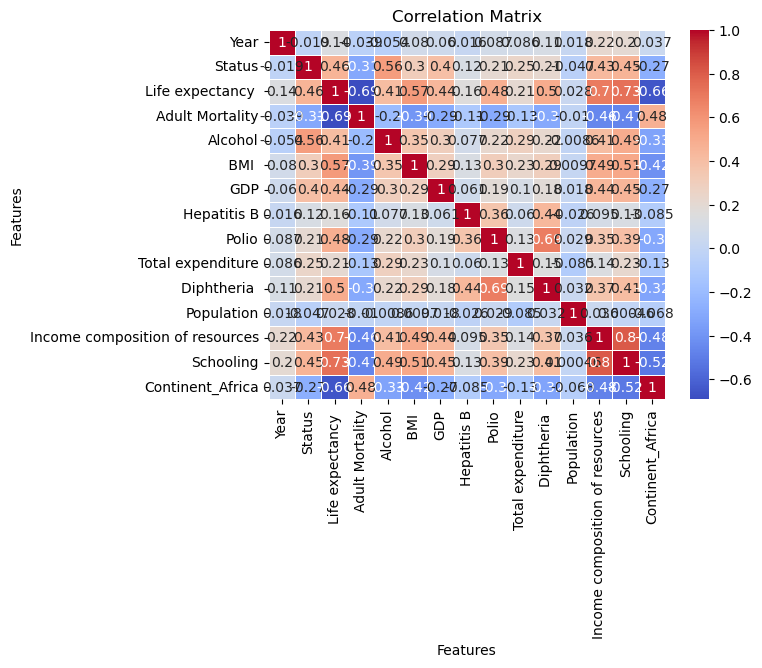

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the life expectancy dataset
life_expectancy = data_scaled_std;

# Select the columns for analysis
cols = ["Year", "Status", "Life expectancy ", "Adult Mortality", "Alcohol", " BMI ", "GDP", "Hepatitis B", "Polio", "Total expenditure", "Diphtheria ", "Population", "Income composition of resources", "Schooling", 'Continent_Africa']

# Create a correlation matrix
corr_matrix = life_expectancy[cols].corr()


# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.50)

# Set the x and y axis labels
plt.xlabel('Features')
plt.ylabel('Features')

# Set the title of the plot
plt.title('Correlation Matrix')


# Display the plot
plt.show()

In [82]:
# Before scaling the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set the target variable
target_variable = cleaned_data['Life expectancy ']

# Select the top 5 features using filter method
selected_features = ['Adult Mortality', ' HIV/AIDS', 'Income composition of resources', 'Schooling', 'Continent_Africa']
X = cleaned_data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=66)

# Create a Linear Regression model and fit it on the training set
lr_model_unscaled_data = LinearRegression()
lr_model_unscaled_data.fit(X_train, y_train)

# Print the coefficients of the model
print(lr_model_unscaled_data.coef_)

# Create a dictionary of feature names and their coefficients
coef_dict = dict(zip(X.columns, lr_model_unscaled_data.coef_))

# Print the dictionary
print(coef_dict)

[-0.02134788 -0.73842667  7.28484283  0.9127531  -3.41774754]
{'Adult Mortality': -0.021347884490448, ' HIV/AIDS': -0.7384266744069956, 'Income composition of resources': 7.284842834368353, 'Schooling': 0.9127531034727909, 'Continent_Africa': -3.4177475361637693}


In [83]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to predict on the test set
y_pred = lr_model_unscaled_data.predict(X_test)

# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Compute the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')

MSE: 19.78
RMSE: 4.45
R2 score: 0.75


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set the target variable
target_variable = data_scaled_std['Life expectancy ']

# Select the top 5 features using filter method
selected_features = ['Adult Mortality', ' HIV/AIDS', 'Income composition of resources', 'Schooling', 'Continent_Africa']
X = data_scaled_std[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=66)

# Create a Linear Regression model and fit it on the training set
lr_model_standard_scalar = LinearRegression()
lr_model_standard_scalar.fit(X_train, y_train)

# Print the coefficients of the model
print(lr_model_standard_scalar.coef_)



# Create a dictionary of feature names and their coefficients
coef_dict = dict(zip(X.columns, lr_model_standard_scalar.coef_))

# Print the dictionary
print(coef_dict)


[-0.26721758 -0.22913185  0.16183914  0.32148485 -0.16632395]
{'Adult Mortality': -0.2672175803680889, ' HIV/AIDS': -0.22913184564244796, 'Income composition of resources': 0.1618391413434481, 'Schooling': 0.32148484751801193, 'Continent_Africa': -0.1663239509629591}


MSE: 0.24
RMSE: 0.49
R2 score: 0.75


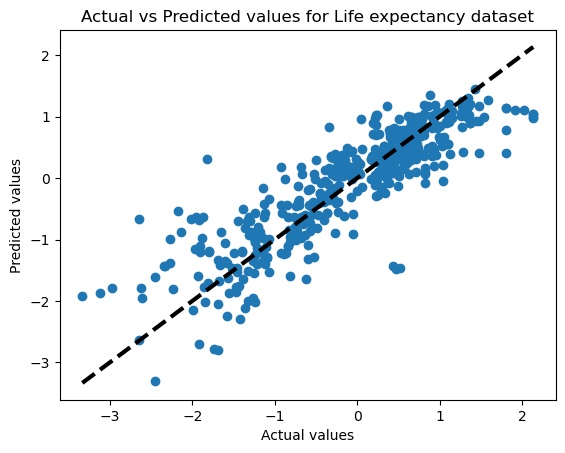

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to predict on the test set
y_pred = lr_model_standard_scalar.predict(X_test)

# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Compute the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values for Life expectancy dataset")
plt.show()


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set the target variable
target_variable = data_scaled_min_max_scalar['Life expectancy ']

# Select the top 5 features using filter method
selected_features = ['Adult Mortality', ' HIV/AIDS', 'Income composition of resources', 'Schooling', 'Continent_Africa']
X = data_scaled_min_max_scalar[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=66)

# Create a Linear Regression model and fit it on the training set
lr_model_min_max_scalar = LinearRegression()
lr_model_min_max_scalar.fit(X_train, y_train)

# Print the coefficients of the model
print(lr_model_min_max_scalar.coef_)

# Create a dictionary of feature names and their coefficients
coef_dict = dict(zip(X.columns, lr_model_min_max_scalar.coef_))

# Print the dictionary
print(coef_dict)

[-0.2694103  -0.31752347  0.13812062  0.35049719 -0.06835495]
{'Adult Mortality': -0.2694103022693959, ' HIV/AIDS': -0.3175234699950084, 'Income composition of resources': 0.13812062013962376, 'Schooling': 0.350497191733552, 'Continent_Africa': -0.06835495072327567}


In [87]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to predict on the test set
y_pred = lr_model_min_max_scalar.predict(X_test)

# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Compute the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')



MSE: 0.01
RMSE: 0.09
R2 score: 0.75


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

# Set the target variable
target_variable = data_scaled['Life expectancy ']

# Select the top 5 features using filter method
selected_features = ['Adult Mortality', ' HIV/AIDS', 'Income composition of resources', 'Schooling', 'Continent_Africa']
X = data_scaled[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=66)


# Create a SGD Regression model and fit it on the training set
sgdr_model= SGDRegressor(random_state=42)
sgdr_model.fit(X_train, y_train)

# Print the coefficients of the model
print(sgdr_model.coef_)

# Create a dictionary of feature names and their coefficients
coef_dict = dict(zip(X.columns, sgdr_model.coef_))

# Print the dictionary
print(coef_dict)

[-0.09377913 -0.09927986  0.27533849  0.270656   -0.12286978]
{'Adult Mortality': -0.09377913185777585, ' HIV/AIDS': -0.09927985746557935, 'Income composition of resources': 0.27533848746736495, 'Schooling': 0.27065600290480296, 'Continent_Africa': -0.1228697843564973}


MSE: 0.01
RMSE: 0.10
R2 score: 0.69


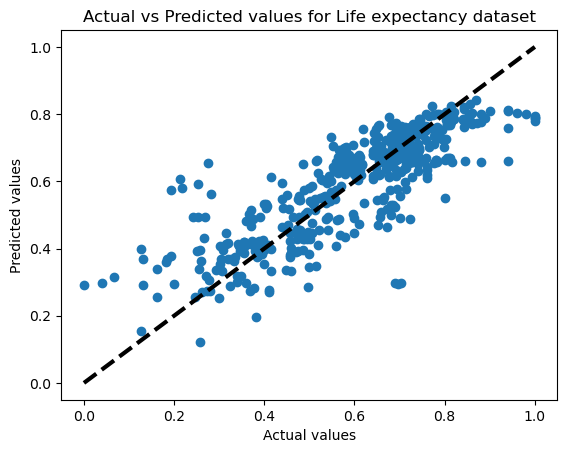

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to predict on the test set
y_pred = sgdr_model.predict(X_test)

# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Compute the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values for Life expectancy dataset")
plt.show()


MSE: 0.00
RMSE: 0.05
R2 score: 0.91


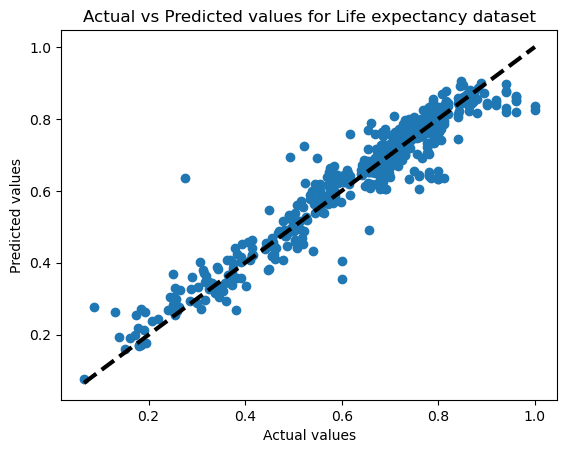

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Set the target variable
target_variable = data_scaled['Life expectancy ']

# Select the top 5 features using filter method
selected_features = ['Adult Mortality', ' HIV/AIDS', 'Income composition of resources', 'Schooling', 'Continent_Africa']
X = data_scaled[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=42)

# Create a MLP Regression model and fit it on the training set
mlp_model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Use the model to predict on the test set
y_pred = mlp_model.predict(X_test)

# Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Compute the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')

# Create a dictionary of feature names and their coefficients
coef_dict = dict(zip(X.columns, mlp_model.coefs_[0]))

# Print the dictionary
#print(coef_dict)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values for Life expectancy dataset")
plt.show()
